<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Classification_SVM_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df=pd.read_csv('CVD_cleaned.csv')

In [45]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [46]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [48]:
df.drop_duplicates()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [49]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [50]:
for i in df.columns:
  dis=len(df[i].unique())
  print(f"{i}-{dis}")

General_Health-5
Checkup-5
Exercise-2
Heart_Disease-2
Skin_Cancer-2
Other_Cancer-2
Depression-2
Diabetes-4
Arthritis-2
Sex-2
Age_Category-13
Height_(cm)-99
Weight_(kg)-525
BMI-3654
Smoking_History-2
Alcohol_Consumption-31
Fruit_Consumption-77
Green_Vegetables_Consumption-75
FriedPotato_Consumption-69


In [51]:
df['Checkup'].value_counts()

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

In [52]:
df['Diabetes'].value_counts()

No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: Diabetes, dtype: int64

In [53]:
from sklearn.preprocessing import OrdinalEncoder

In [54]:
enc=OrdinalEncoder()
df['Exercise']=enc.fit_transform(df[['Exercise']])
df['Heart_Disease']=enc.fit_transform(df[['Heart_Disease']])
df['Skin_Cancer']=enc.fit_transform(df[['Skin_Cancer']])
df['Other_Cancer']=enc.fit_transform(df[['Other_Cancer']])
df['Depression']=enc.fit_transform(df[['Depression']])
df['Sex']=enc.fit_transform(df[['Sex']])
df['Arthritis']=enc.fit_transform(df[['Arthritis']])
df['Smoking_History']=enc.fit_transform(df[['Smoking_History']])
df.head(10)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0
5,Good,Within the past year,0.0,0.0,0.0,0.0,1.0,No,1.0,1.0,60-64,183.0,154.22,46.11,0.0,0.0,12.0,12.0,12.0
6,Fair,Within the past year,1.0,1.0,0.0,0.0,0.0,No,1.0,1.0,60-64,175.0,69.85,22.74,1.0,0.0,16.0,8.0,0.0
7,Good,Within the past year,1.0,0.0,0.0,0.0,0.0,No,1.0,0.0,65-69,165.0,108.86,39.94,1.0,3.0,30.0,8.0,8.0
8,Fair,Within the past year,0.0,0.0,0.0,0.0,1.0,No,0.0,0.0,65-69,163.0,72.57,27.46,1.0,0.0,12.0,12.0,4.0
9,Fair,Within the past year,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0,70-74,163.0,91.63,34.67,0.0,0.0,12.0,12.0,1.0


In [55]:
rank=['Poor','Fair','Good','Very Good','Excellent']
oe = OrdinalEncoder(categories=[rank])
df['General_Health']=oe.fit_transform(df[['General_Health']])
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,No,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,Yes,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,Yes,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,Yes,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,No,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0
5,2.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,1.0,1.0,60-64,183.0,154.22,46.11,0.0,0.0,12.0,12.0,12.0
6,1.0,Within the past year,1.0,1.0,0.0,0.0,0.0,No,1.0,1.0,60-64,175.0,69.85,22.74,1.0,0.0,16.0,8.0,0.0
7,2.0,Within the past year,1.0,0.0,0.0,0.0,0.0,No,1.0,0.0,65-69,165.0,108.86,39.94,1.0,3.0,30.0,8.0,8.0
8,1.0,Within the past year,0.0,0.0,0.0,0.0,1.0,No,0.0,0.0,65-69,163.0,72.57,27.46,1.0,0.0,12.0,12.0,4.0
9,1.0,Within the past year,0.0,0.0,0.0,0.0,0.0,Yes,1.0,0.0,70-74,163.0,91.63,34.67,0.0,0.0,12.0,12.0,1.0


In [56]:
rank1=['No','No, pre-diabetes or borderline diabetes','Yes, but female told only during pregnancy','Yes']
oe1 = OrdinalEncoder(categories=[rank1])
df['Diabetes']=oe1.fit_transform(df[['Diabetes']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,Within the past 2 years,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,Within the past year,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,Within the past year,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,Within the past year,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,Within the past year,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [57]:
rank2=['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']
oe2 = OrdinalEncoder(categories=[rank2])
df['Checkup']=oe2.fit_transform(df[['Checkup']])
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70-74,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70-74,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60-64,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75-79,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80+,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0


In [58]:
df['Age_Category']=df['Age_Category'].str[:2].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  float64
 1   Checkup                       308854 non-null  float64
 2   Exercise                      308854 non-null  float64
 3   Heart_Disease                 308854 non-null  float64
 4   Skin_Cancer                   308854 non-null  float64
 5   Other_Cancer                  308854 non-null  float64
 6   Depression                    308854 non-null  float64
 7   Diabetes                      308854 non-null  float64
 8   Arthritis                     308854 non-null  float64
 9   Sex                           308854 non-null  float64
 10  Age_Category                  308854 non-null  int64  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [60]:
df['Heart_Disease'].value_counts()

0.0    283883
1.0     24971
Name: Heart_Disease, dtype: int64

In [61]:
df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70,150.0,32.66,14.54,1.0,0.0,30.0,16.0,12.0
1,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,70,165.0,77.11,28.29,0.0,0.0,30.0,0.0,4.0
2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,60,163.0,88.45,33.47,0.0,4.0,12.0,3.0,16.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,75,180.0,93.44,28.73,0.0,0.0,30.0,30.0,8.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80,191.0,88.45,24.37,1.0,0.0,8.0,4.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,60,183.0,154.22,46.11,0.0,0.0,12.0,12.0,12.0
6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,60,175.0,69.85,22.74,1.0,0.0,16.0,8.0,0.0
7,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,65,165.0,108.86,39.94,1.0,3.0,30.0,8.0,8.0
8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65,163.0,72.57,27.46,1.0,0.0,12.0,12.0,4.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,70,163.0,91.63,34.67,0.0,0.0,12.0,12.0,1.0


<ipython-input-62-74db99337c28>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age_Category'],bins=10)


<Axes: xlabel='Age_Category', ylabel='Density'>

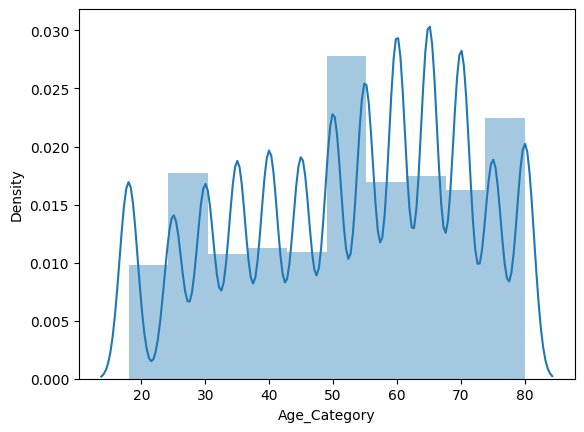

In [62]:
sns.distplot(df['Age_Category'],bins=10)

<Axes: xlabel='FriedPotato_Consumption', ylabel='Green_Vegetables_Consumption'>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


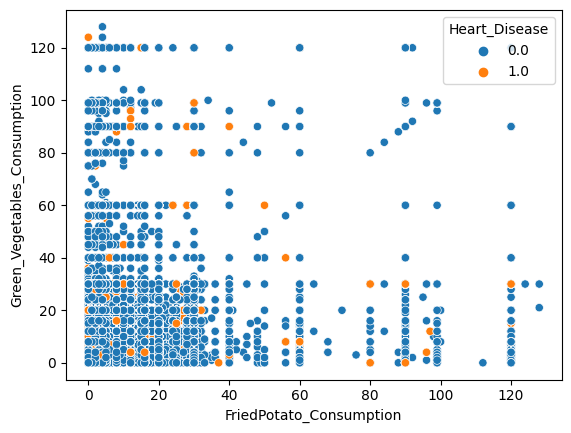

In [63]:
sns.scatterplot(x='FriedPotato_Consumption',y='Green_Vegetables_Consumption',hue='Heart_Disease',data=df)

<Axes: xlabel='FriedPotato_Consumption', ylabel='BMI'>

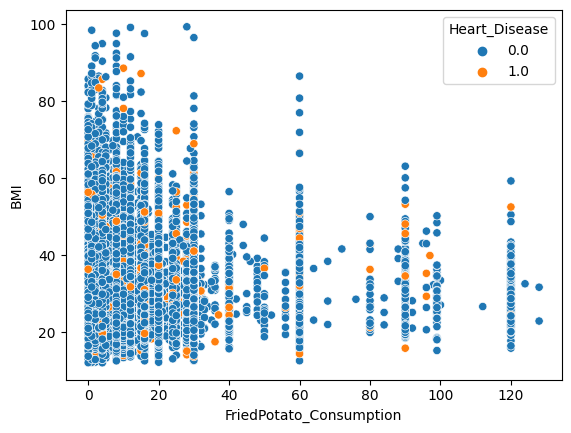

In [64]:
sns.scatterplot(x='FriedPotato_Consumption',y='BMI',hue='Heart_Disease',data=df)


<Axes: >

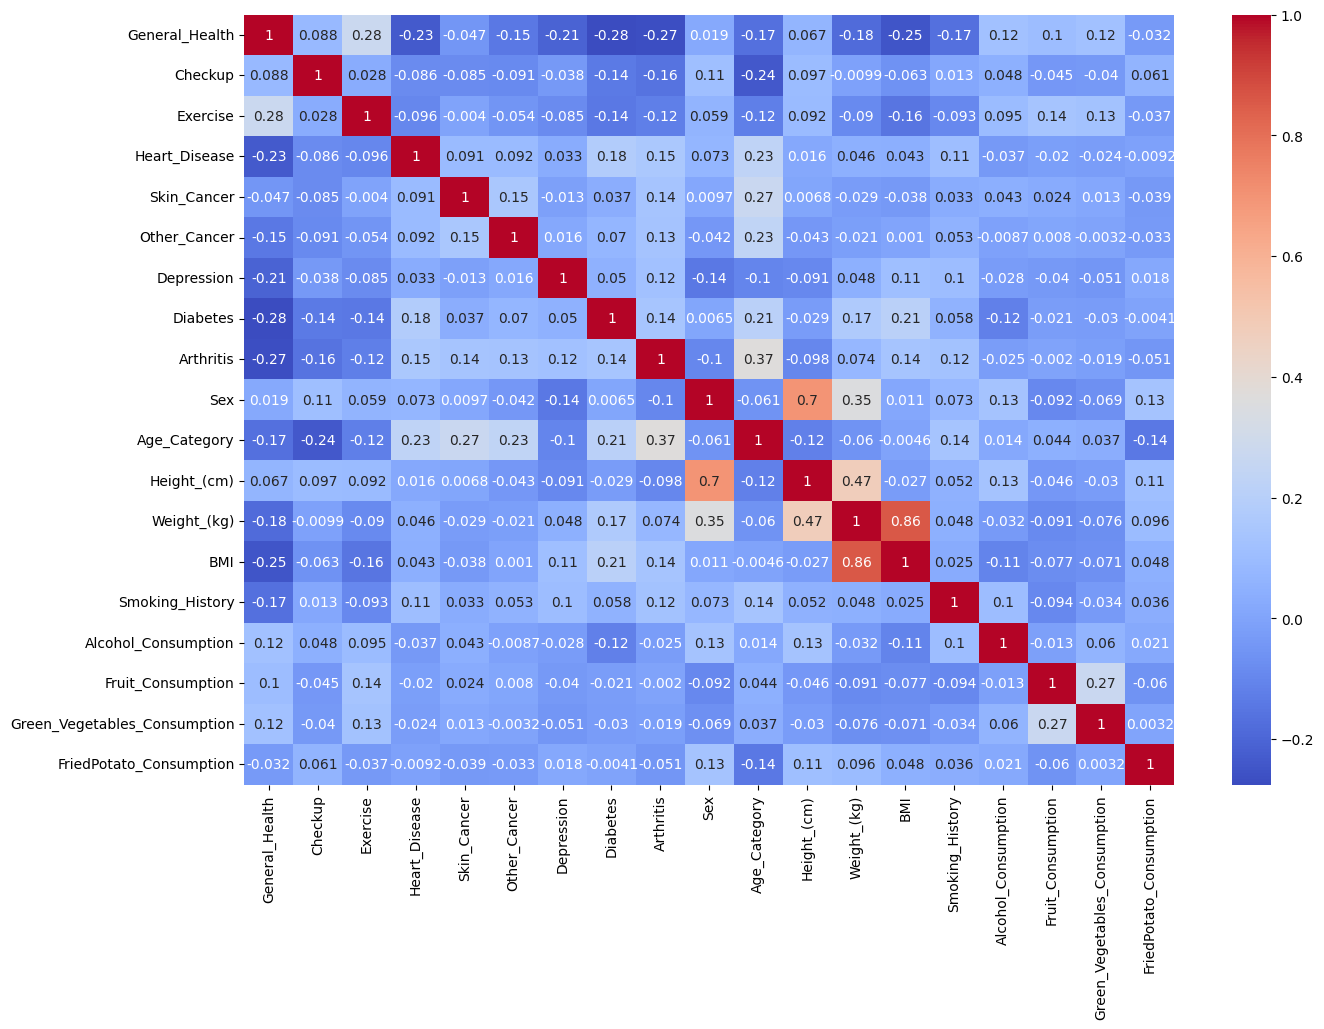

In [65]:
correlation_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
X=df.drop(['Heart_Disease'],axis=1)
y=df['Heart_Disease']

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm=SMOTE(sampling_strategy='minority')
X,y=sm.fit_resample(X,y)
y.value_counts()

0.0    283883
1.0    283883
Name: Heart_Disease, dtype: int64

In [70]:
scalar=MinMaxScaler()
X1=scalar.fit_transform(X)
X1.shape

(567766, 18)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,stratify=y)
X_train1=X_train[:80000]
y_train1=y_train[:80000]

In [72]:
from sklearn import svm

In [73]:
svm_model=svm.SVC(C=5,kernel='linear',degree=1,gamma='auto')
svm_model.fit(X_train1,y_train1)

SVC(C=5, degree=1, gamma='auto', kernel='linear')

In [74]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics
X_pred1=svm_model.predict(X_train)
score=accuracy_score(y_train,X_pred1)
y_pred1=svm_model.predict(X_test)
score1=accuracy_score(y_pred1,y_test)
print(score,score1)

0.774288217836605 0.7765820666819311


In [75]:
sm=metrics.confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76     56777
         1.0       0.75      0.83      0.79     56777

    accuracy                           0.78    113554
   macro avg       0.78      0.78      0.78    113554
weighted avg       0.78      0.78      0.78    113554



Text(50.722222222222214, 0.5, 'True')

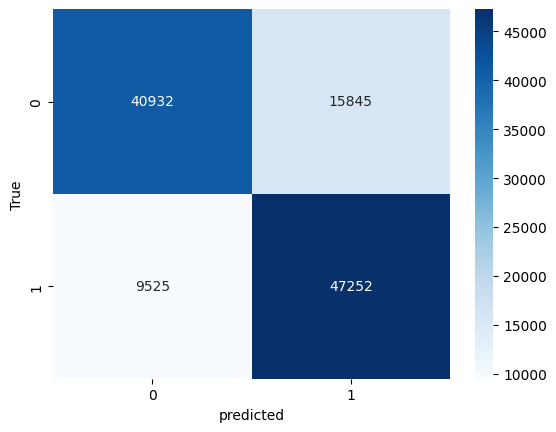

In [76]:
sns.heatmap(sm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True')

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf=RandomForestClassifier(min_samples_leaf=4,max_depth=10,min_samples_split=10,n_estimators=100)

In [79]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [80]:
X1_pred=rf.predict(X_train)
score2=accuracy_score(y_train,X1_pred)
y1_pred=rf.predict(X_test)
score3=accuracy_score(y_test,y1_pred)
print(score2,score3)

0.9374719294074133 0.9378885816439756


In [82]:
cm = metrics.confusion_matrix(y_test, y1_pred)
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     56777
         1.0       0.96      0.92      0.94     56777

    accuracy                           0.94    113554
   macro avg       0.94      0.94      0.94    113554
weighted avg       0.94      0.94      0.94    113554



Text(50.722222222222214, 0.5, 'True')

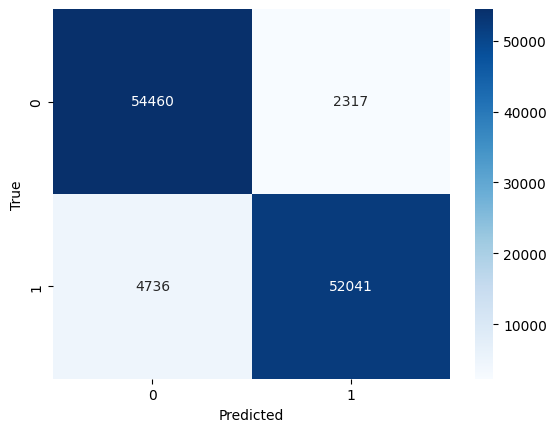

In [83]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [84]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [85]:
model=Sequential()
model.add(Dense(9,activation='relu',input_dim=18))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [86]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
11356/11356 [==============================] - 51s 4ms/step - loss: 0.3953 - accuracy: 0.8175 - val_loss: 0.3102 - val_accuracy: 0.8594
Epoch 2/10
11356/11356 [==============================] - 44s 4ms/step - loss: 0.2869 - accuracy: 0.8697 - val_loss: 0.2727 - val_accuracy: 0.8748
Epoch 3/10
11356/11356 [==============================] - 45s 4ms/step - loss: 0.2637 - accuracy: 0.8799 - val_loss: 0.2593 - val_accuracy: 0.8808
Epoch 4/10
11356/11356 [==============================] - 44s 4ms/step - loss: 0.2551 - accuracy: 0.8839 - val_loss: 0.2519 - val_accuracy: 0.8844
Epoch 5/10
11356/11356 [==============================] - 43s 4ms/step - loss: 0.2502 - accuracy: 0.8855 - val_loss: 0.2465 - val_accuracy: 0.8890
Epoch 6/10
11356/11356 [==============================] - 44s 4ms/step - loss: 0.2473 - accuracy: 0.8871 - val_loss: 0.2466 - val_accuracy: 0.8876
Epoch 7/10
11356/11356 [==============================] - 44s 4ms/step - loss: 0.2454 - accuracy: 0.8884 - val_loss: 0

In [92]:
y_rec=model.predict(X_test)

3549/3549 [==============================] - 5s 1ms/step


In [93]:
y_pred2=np.where(y_rec>0.5,1,0)

In [94]:
accuracy_score(y_test,y_pred2)

0.8917783609560209

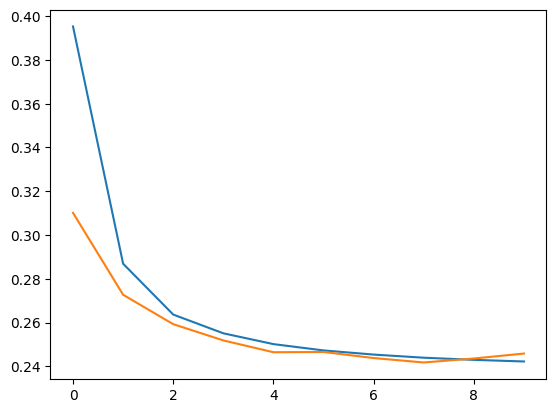

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

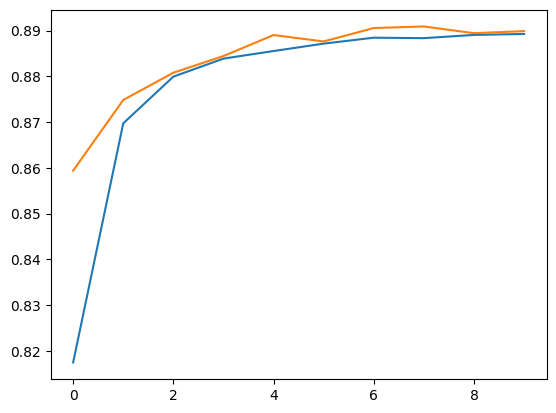

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [97]:
cm=metrics.confusion_matrix(y_test,y_pred2)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     56777
         1.0       0.95      0.83      0.88     56777

    accuracy                           0.89    113554
   macro avg       0.90      0.89      0.89    113554
weighted avg       0.90      0.89      0.89    113554



Text(50.722222222222214, 0.5, 'True')

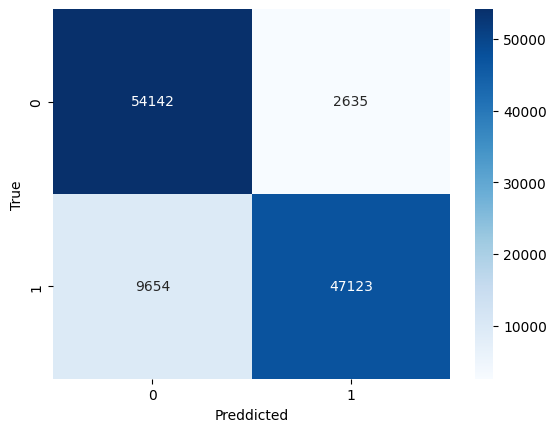

In [98]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Preddicted')
plt.ylabel('True')